---
## **`APM1111 - FA 5`**
#### **Author: Sean Angelo T. Lagua**
#### **Date: October 9, 2023**
#### **Chapter: Sampling Theory**
---

#### __Problem 8.18__
List all samples of size $n = 2$ that are possible (with replacement) from the population in Problem 8.17. Plot the sampling distribution of the mean to show that $\mu_{\bar{x}} = \mu$, and show that $\sigma_{\bar{x}}^{2} = \sigma^{2} / 2$.

__Solution__

From the previous problem 8.17, we were given the values $x = 9, 12,$ and $15$ representing the credit hours a student is taking. From this, we can see that $N=3$, thus we list all the possible sample size of $n = 2$ with replacement by using the formula $N^{n}$ to obtain a list of $9$ possible sample size from the population.

In [84]:
population_size = 3
sample_size = 2
combination = pow(3, 2)
members = [9, 12, 15]
sample_combination = [tuple((i,j)) for i in members for j in members]

print(f"Possible number of combination: {combination}")
print(f"List of all possible sample size: \n{sample_combination}")

Possible number of combination: 9
List of all possible sample size: 
[(9, 9), (9, 12), (9, 15), (12, 9), (12, 12), (12, 15), (15, 9), (15, 12), (15, 15)]


After getting the possilbe list of sample size from the population, we then get the sampling distribution of the sample mean. We first get the mean of mean of each sample size.

In [85]:
sample_mean = [((pair[0] + pair[1]) / 2) for pair in sample_combination ]
print(f"List of the sample mean of each sample size: \n{sample_mean}")

List of the sample mean of each sample size: 
[9.0, 10.5, 12.0, 10.5, 12.0, 13.5, 12.0, 13.5, 15.0]


As we can see, we get the following sample mean:

In [103]:
xbar = []
for mean in sample_mean:
    if mean not in xbar:
        xbar.append(mean)
print(f"The list of sample mean: \n{xbar}")

The list of sample mean: 
[9.0, 10.5, 12.0, 13.5, 15.0]


Now that we have the list of the sample mean, we proceed by computing the sampling distribution of the sample mean.

In [184]:
# Count the frequency of each sample mean
xbar_freq = [round((sample_mean.count(mean)/combination), 15) for mean in xbar]
print(f"Sampling distribution of the sample mean: \n{xbar_freq}")

Sampling distribution of the sample mean: 
[0.111111111111111, 0.222222222222222, 0.333333333333333, 0.222222222222222, 0.111111111111111]


From here, we can easily get the mean of the sample mean using the formula $\mu_{\bar{x}} = \sum\bar{x}p(\bar{x})$.

In [185]:
# Getting xbar x p(xbar) of each sample mean
xbar_pxbar = [(round((xbar[index] * xbar_freq[index]), 9)) for index in range(len(xbar))]
print(f"xbar x p(xbar): \n{xbar_pxbar}")

# Getting the sum
mu_xbar = sum(xbar_pxbar)
print(f"Mean of the sample mean: {mu_xbar}")

mu_population = sum(members) / len(members)
print(f"Mean of the population: {mu_population}")

xbar x p(xbar): 
[1.0, 2.333333333, 4.0, 3.0, 1.666666667]
Mean of the sample mean: 12.0
Mean of the population: 12.0


Here we see that the mean of sample mean is just the same as the mean of the population. Thus, it follows that $\mu_{\bar{x}} = \mu$. We now proceed in getting the variance of the sample mean. This is done by using the fomrula $\sigma_{\bar{x}}^{2} = \sum\bar{x}^2p(\bar{x}) - \mu_{\bar{x}}^2$.

In [207]:
var_t1 = [(round((pow(xbar[index], 2) * xbar_freq[index]), 9)) for index in range(len(xbar))]
print(f"xbar\u00b2 x p(xbar): \n{var_t1}")

# Getting the sum
var_t1_sum = sum(var_t1)
print(f"The sum of xbar\u00b2 x p(xbar): {var_t1_sum}")

# Subtracting from mu_xbar^2
var_t2 = mu_xbar ** 2
var_sample = var_t1_sum - var_t2
print(f"The variance of the sample mean: {var_sample}")

# Variance of the population
var_sum = 0
for item in members:
    var_sum += pow(item, 2) / len(members)
var_population = var_sum - pow(mu_population, 2)
print(f"Variance of population: {var_population}")

# Appending the values of mean of the sample mean and the sum of xbar^2 x p(xbar)
# xbar_pxbar.append(mu_xbar)
# var_t1.append(var_t1_sum)


xbar² x p(xbar): 
[9.0, 24.5, 48.0, 40.5, 25.0]
The sum of xbar² x p(xbar): 147.0
The variance of the sample mean: 3.0
Variance of population: 6.0


Thus, we notice that $\sigma_{\bar{x}}^{2} = \sigma^{2} / 2$ holds true. We format out data by creating a table to better visualize our work.

In [217]:
import pandas as pd
import numpy as np
from operator import itemgetter

data = {"A":list(map(itemgetter(0), sample_combination)), 
         "B":list(map(itemgetter(1), sample_combination)), 
         "Mean":sample_mean,
         "xbar":xbar,
         "p(xbar)":xbar_freq,
         "xbar x p(xbar)": xbar_pxbar,
         "xbar^2 x p(xbar)":var_t1
        }

# del xbar_pxbar[5:]
# data

# for key, value in data.items():
#     for i in range(len(value)):
#         if(value[i] )

df = pd.DataFrame(
    dict([(key, pd.Series(value))
            for key, value in data.items()
        ]
    )
)

# Formats floats and ints
df[['xbar','p(xbar)','xbar x p(xbar)', 'xbar^2 x p(xbar)']] = df[['xbar','p(xbar)','xbar x p(xbar)', 'xbar^2 x p(xbar)']].fillna('')
df.update(df.select_dtypes(include=np.number).applymap('{:,g}'.format))
df

,A,B,Mean,xbar,p(xbar),xbar x p(xbar),xbar^2 x p(xbar)
0,9,9,9,9.0,0.111111,1.0,9.0
1,9,12,10.5,10.5,0.222222,2.333333,24.5
2,9,15,12,12.0,0.333333,4.0,48.0
3,12,9,10.5,13.5,0.222222,3.0,40.5
4,12,12,12,15.0,0.111111,1.666667,25.0
5,12,15,13.5,,,12.0,147.0
6,15,9,12,,,,
7,15,12,13.5,,,,
8,15,15,15,,,,


Graphing the table above we get the following.

Text(0.5, 0, 'xbar')

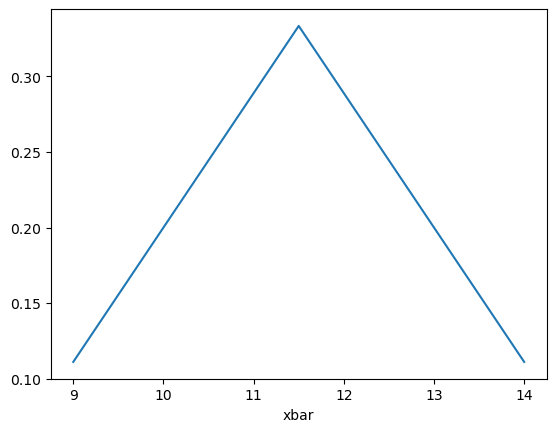

In [264]:
import matplotlib.pyplot as plt

x = np.arange(members[0], members[-1], 1.25)
y = xbar_freq
plt.plot(x, y)
plt.xlabel("xbar")

#### __Problem 8.21__
A population consists of the four numbers 3, 7, 11, and 15. Consider all possible samples of size 2 that can be drawn with replacement from this population. Find (a) the population mean, (b) the population standard deviation, (c) the mean of the sampling distribution of means, and (d) the standard deviation of the sampling distribution of means. Verify parts (c) and (d) directly from (a) and (b) by using suitable formulas.

__Solution__

In [54]:
import math

population_size = 4
sample_size = 2
combination = pow(4, 2)
members = [3, 7, 11, 15]
sample_combination = [tuple((i,j)) for i in members for j in members]

# print(f"Possible number of combination: {combination}")
# print(f"List of all possible sample size: \n{sample_combination}")

# print("\n")
sample_mean = [((pair[0] + pair[1]) / 2) for pair in sample_combination ]
# print(f"List of the sample mean of each sample size: \n{sample_mean}")

xbar = []
for mean in sample_mean:
    if mean not in xbar:
        xbar.append(mean)
# print("\n")
print(f"The list of sample mean: \n{xbar}")
print("\n")

# Count the frequency of each sample mean
xbar_freq = [round((sample_mean.count(mean)/combination), 15) for mean in xbar]
# print(f"Sampling distribution of the sample mean: \n{xbar_freq}")

# print("\n")
# Getting xbar x p(xbar) of each sample mean
xbar_pxbar = [(round((xbar[index] * xbar_freq[index]), 9)) for index in range(len(xbar))]
# print(f"xbar x p(xbar): \n{xbar_pxbar}")

# Getting the sum
mu_xbar = sum(xbar_pxbar)

mu_population = sum(members) / population_size

# print("\n")
var_t1 = [(round((pow(xbar[index], 2) * xbar_freq[index]), 9)) for index in range(len(xbar))]
# print(f"xbar\u00b2 x p(xbar): \n{var_t1}")

# Getting the sum
var_t1_sum = sum(var_t1)
# print(f"The sum of xbar\u00b2 x p(xbar): {var_t1_sum}")

# Variance of the population
var_sum = 0
for item in members:
    var_sum += pow(item, 2) * (1/population_size)
# var_population = var_sum / population_size
sd_population = math.sqrt((var_sum) - pow(mu_population, 2))
var_population = pow(sd_population, 2)

# Subtracting from mu_xbar^2
var_t2 = mu_xbar ** 2
var_sample = var_t1_sum - var_t2
sd_sample = math.sqrt(var_sample)

print(f"a) Mean of the population: {mu_population}")
print(f"b) Standard deviation of the population: {sd_population}")
print(f"c) Mean of the sample mean: {mu_xbar}")
print(f"d) Standard deviation of the sampling distribution mean: {sd_sample}")


The list of sample mean: 
[3.0, 5.0, 7.0, 9.0, 11.0, 13.0, 15.0]


a) Mean of the population: 9.0
b) Standard deviation of the population: 4.47213595499958
c) Mean of the sample mean: 9.0
d) Standard deviation of the sampling distribution mean: 3.1622776601683795


#### __Verification__

__c) Mean of the sample mean__

$$\mu_{\bar{x}} = (3 + 5 + 7 + 9 + 11 + 13 + 15) / 7$$
$$= 63 / 7$$
$$= 9$$

$$\mu = (3 + 7 + 11 + 15) / 4$$
$$ = 36 / 4$$
$$ = 9$$

Thus we see that $\mu_{\bar{x}} = \mu$.

__d) Standard deviation of the sampling distribution mean__

$$\sigma_{\bar{x}} = \frac{\sigma}{\sqrt N}$$

From our computation above, we obtained $\sigma = 4.47213595499958$. Plugging this into the equation we get

$$\sigma_{\bar{x}} = \frac{4.47213595499958}{\sqrt 2}$$
$$ = 3.1622776601683795$$

#### __Problem 8.34__
Find the probability that of the next 200 children born, (a) less than 40% will be boys, (b) between 43% and 57% will be girls, and (c) more than 54% will be boys. Assume equal probabilities for the births of boys and girls.

__Solution__

In [120]:
n = 200
p = 0.5
sd = math.sqrt((p * (1 - p)) / n)

z_less40 = ((0.4 - 0.5) / sd)
z_more43 = ((0.43 - 0.5) / sd)
z_less57 = ((0.57 - 0.5) / sd)
z_more54 = ((0.54 - 0.5) / sd)

# Values used are from the z-table
less40 = abs(round((0.4981 - p), 4))
more43 = abs(round((0.4713 - p), 4))
less57 = abs(round((0.4713 + p), 4))
bet43_57 = round((less57 - more43), 4)
more54 = round((1 - abs(round((.3849 + p), 4))), 4)

print(f"Probability that less than 40% will be boys: {less40 * 100}%")
print(f"Probability that between 43% and 57% will be girls: {bet43_57 * 100}%")
print(f"Probability that more than 54% will be boys: {more54 * 100}%")

Probability that less than 40% will be boys: 0.19%
Probability that between 43% and 57% will be girls: 94.26%
Probability that more than 54% will be boys: 11.51%


### __Problem 8.49__
The credit hour distribution at Metropolitan Technological College is as follows:
<center>

|x      |p(x)   |
|:-----:|:-----:|
|6      |0.1    |
|9      |0.2    |
|12     |0.4    |
|15     |0.2    |
|18     |0.1    |

</center>

Find $\mu$ and $\sigma^{2}$. Give the 25 (with replacement) possible samples of size 2, their means, and their probabilities.

__Solution__

In [137]:
members = [6, 9, 12, 15, 18]

sample_size = 2
combination = len(members) ** sample_size

mu_population = sum(members) / len(members)
print(f"The mean of the population is: {mu_population}")

numerator = 0
for element in members:
    numerator += (element - mu_population) ** 2
sd_population = (numerator / len(members))

print(f"The variance of the population is: {sd_population}")

The mean of the population is: 12.0
The variance of the population is: 18.0


After getting the possilbe list of sample size from the population, we then get the sampling distribution of the sample mean. We first get the mean of mean of each sample size.

In [140]:
sample_combination = [tuple((i,j)) for i in members for j in members]
print(f"Possible number of combination: {combination}")
print(f"List of all possible sample size: \n{sample_combination}")

Possible number of combination: 25
List of all possible sample size: 
[(6, 6), (6, 9), (6, 12), (6, 15), (6, 18), (9, 6), (9, 9), (9, 12), (9, 15), (9, 18), (12, 6), (12, 9), (12, 12), (12, 15), (12, 18), (15, 6), (15, 9), (15, 12), (15, 15), (15, 18), (18, 6), (18, 9), (18, 12), (18, 15), (18, 18)]


As we can see, we get the following sample mean:

In [141]:
sample_mean = [((pair[0] + pair[1]) / 2) for pair in sample_combination ]
print(f"List of the sample mean of each sample size: \n{sample_mean}")

List of the sample mean of each sample size: 
[6.0, 7.5, 9.0, 10.5, 12.0, 7.5, 9.0, 10.5, 12.0, 13.5, 9.0, 10.5, 12.0, 13.5, 15.0, 10.5, 12.0, 13.5, 15.0, 16.5, 12.0, 13.5, 15.0, 16.5, 18.0]


Now that we have the list of the sample mean, we proceed by computing the sampling distribution of the sample mean.

In [142]:
xbar = []
for mean in sample_mean:
    if mean not in xbar:
        xbar.append(mean)
print(f"The list of sample mean: \n{xbar}")

The list of sample mean: 
[6.0, 7.5, 9.0, 10.5, 12.0, 13.5, 15.0, 16.5, 18.0]


From here, we can easily get the mean of the sample mean using the formula $\mu_{\bar{x}} = \sum\bar{x}p(\bar{x})$.

In [144]:
# Count the frequency of each sample mean
xbar_freq = [round((sample_mean.count(mean)/combination), 15) for mean in xbar]
print(f"Sampling distribution of the sample mean: \n{xbar_freq}")

# Getting xbar x p(xbar) of each sample mean
xbar_pxbar = [(round((xbar[index] * xbar_freq[index]), 9)) for index in range(len(xbar))]
print(f"xbar x p(xbar): \n{xbar_pxbar}")

# Getting the sum
mu_xbar = sum(xbar_pxbar)
print(f"Mean of the sample mean: {mu_xbar:.0f}")

Sampling distribution of the sample mean: 
[0.04, 0.08, 0.12, 0.16, 0.2, 0.16, 0.12, 0.08, 0.04]
xbar x p(xbar): 
[0.24, 0.6, 1.08, 1.68, 2.4, 2.16, 1.8, 1.32, 0.72]
Mean of the sample mean: 12


Putting the data into a table to better visualize our work.

In [148]:
import pandas as pd
import numpy as np
from operator import itemgetter

data = {"A":list(map(itemgetter(0), sample_combination)), 
         "B":list(map(itemgetter(1), sample_combination)), 
         "Mean":sample_mean,
         "xbar":xbar,
         "p(xbar)":xbar_freq,
        }

df = pd.DataFrame(
    dict([(key, pd.Series(value))
            for key, value in data.items()
        ]
    )
)

# Formats floats and ints
df[['xbar','p(xbar)']] = df[['xbar','p(xbar)']].fillna('')
df.update(df.select_dtypes(include=np.number).applymap('{:,g}'.format))
df

,A,B,Mean,xbar,p(xbar)
0,6,6,6,6.0,0.04
1,6,9,7.5,7.5,0.08
2,6,12,9,9.0,0.12
3,6,15,10.5,10.5,0.16
4,6,18,12,12.0,0.2
5,9,6,7.5,13.5,0.16
6,9,9,9,15.0,0.12
7,9,12,10.5,16.5,0.08
8,9,15,12,18.0,0.04
9,9,18,13.5,,
